In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

In [217]:
# tendencia - direção
# sazonalidade - recorrência das oscilações
# resíduo -  o que sobra do sinal

In [218]:
df_path = 'https://raw.githubusercontent.com/jdlmauricio/techalleg_fase_2/refs/heads/main/Dados%20Hist%C3%B3ricos%20-%20Ibovespa.csv'

In [219]:
df = pd.read_csv(df_path, parse_dates=[0], index_col='Data')
df.drop(['Abertura',	'Máxima',	'Mínima',	'Vol.',	'Var%'], axis=1, inplace=True)
df.head()

C:\Users\jdlma\AppData\Local\Temp\ipykernel_15108\2914478466.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(df_path, parse_dates=[0], index_col='Data')


,Último
Data,
2024-12-30,120.283
2024-12-27,120.269
2024-12-26,121.078
2024-12-23,120.767
2024-12-20,122.102


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4953 entries, 2024-12-30 to 2005-01-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Último  4953 non-null   float64
dtypes: float64(1)
memory usage: 77.4 KB


In [221]:
#df.index = pd.to_datetime(df.DATE, format = "%m-%d-%Y")

In [222]:
#df.drop("DATE", inplace=True, axis=1)

In [223]:
# Renomear a coluna 'Último' para 'Value'
df.rename(columns={'Último': 'Value'}, inplace=True)


df.head()

,Value
Data,
2024-12-30,120.283
2024-12-27,120.269
2024-12-26,121.078
2024-12-23,120.767
2024-12-20,122.102


In [224]:
df.loc['2010-03-01']

Value    67.228
Name: 2010-03-01 00:00:00, dtype: float64

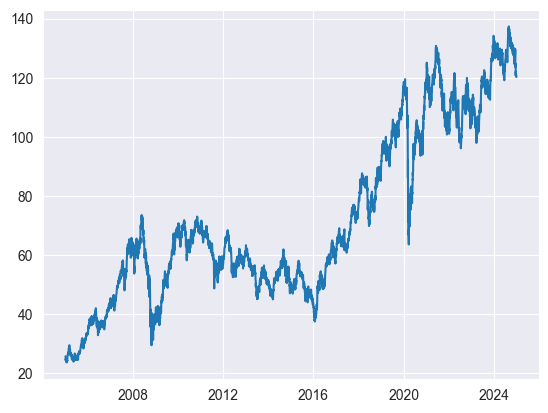

In [225]:
plt.plot(df.index, df.Value)

In [226]:
resultados = seasonal_decompose(df['Value'], model='additive', period=252)

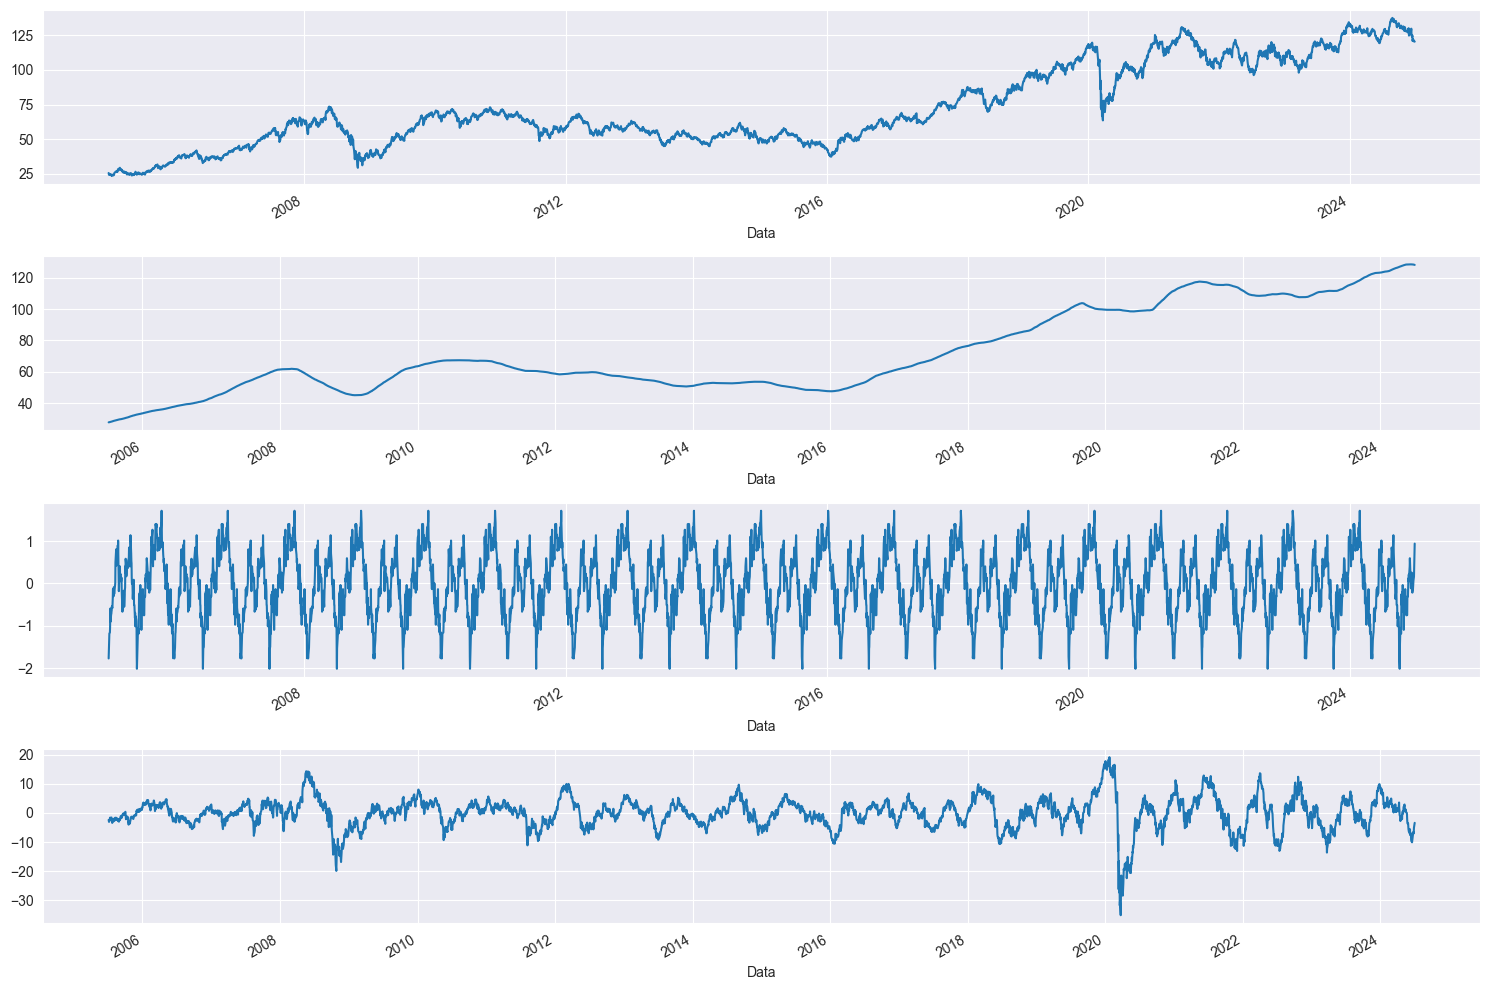

In [227]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [228]:
# Estacionária ou não estacionária

# ADF - Augmented Dickey Fuller

# H0 - Hipótese Nula (não é estacionária)
# H1 - Hipótese Alternativa (rejeição da hipótese nula)

# p -value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [229]:
from statsmodels.tsa.stattools import adfuller

In [230]:
sns.set_style('darkgrid')

In [231]:
X = df.Value.values

In [232]:
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -1.5733076121469949
P-Value: 0.4969865905504075
Valores críticos:
	1%: -3.4316738971778435
	5%: -2.8621250178829576
	10%: -2.567081405988135


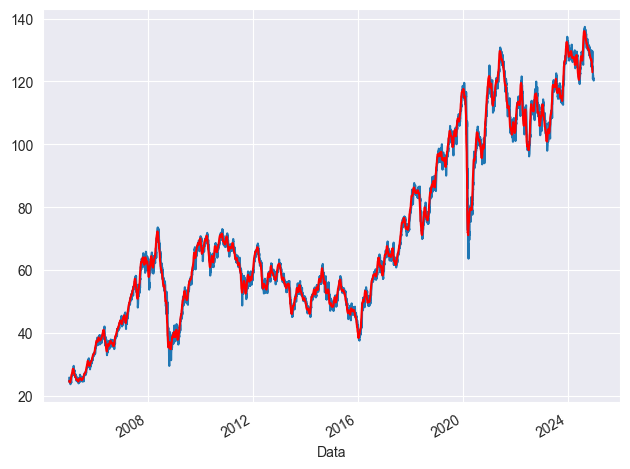

In [233]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

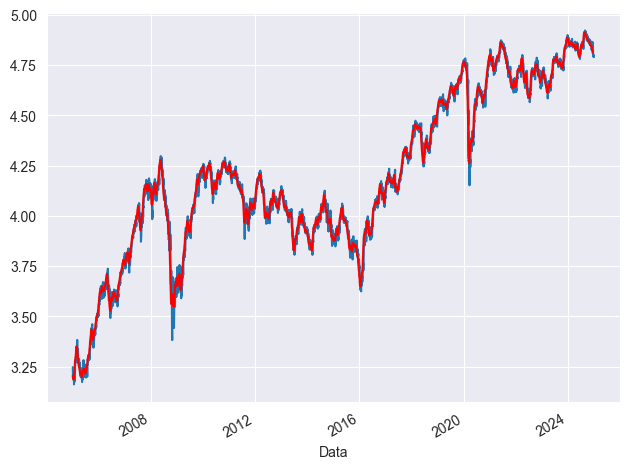

In [234]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

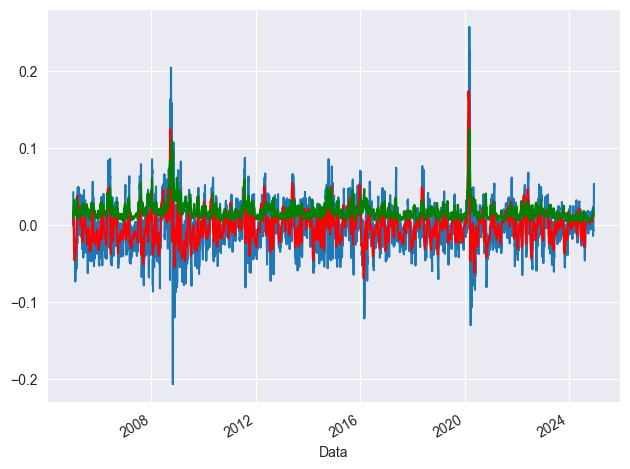

In [235]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()


In [236]:
X_s = df_s.Value.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")


Teste ADF
Teste Estatístico: -13.118620803409234
P-Value: 1.5800353635571575e-24
Valores críticos:
	1%: -3.431679549761321
	5%: -2.8621275151488854
	10%: -2.5670827353828365


Teste ADF
Teste Estatístico: -18.795181192064724
P-Value: 2.023193371818644e-30
Valores críticos:
	1%: -3.431683073233079
	5%: -2.8621290717879777
	10%: -2.5670835640445984


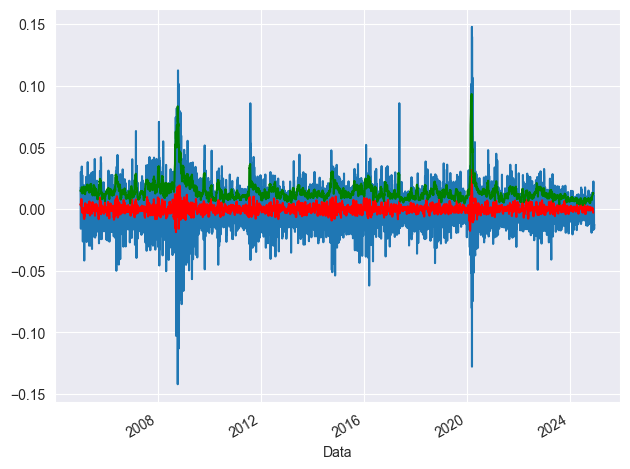

In [237]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()


f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = df_diff.Value.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

In [238]:
#ARIMA - (AR): Autoregressivo, I: Integrado, MA:Moving Average

# A(x,y,z) -> ACF, PACF

In [239]:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

In [240]:
#5% ACF

# 1.96/sqrt(N-d) -> N - número de pojntos do df e d é o número de vezes que nós diferenciamos o df

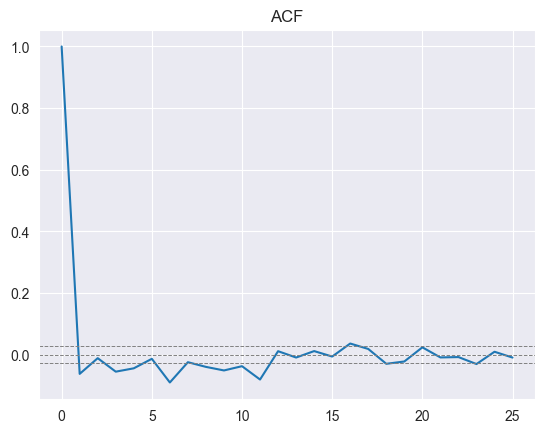

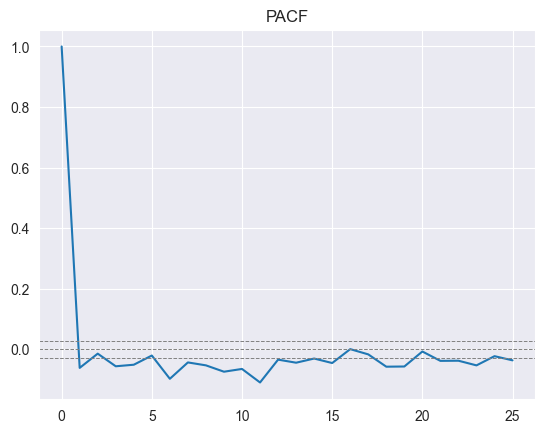

In [241]:
plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("PACF")
plt.show()

In [242]:
#A(x,y,z)

In [243]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

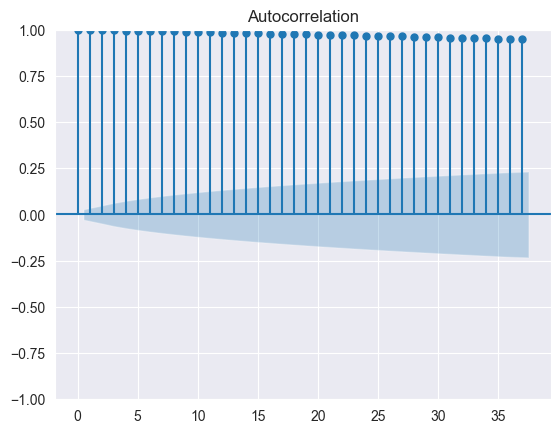

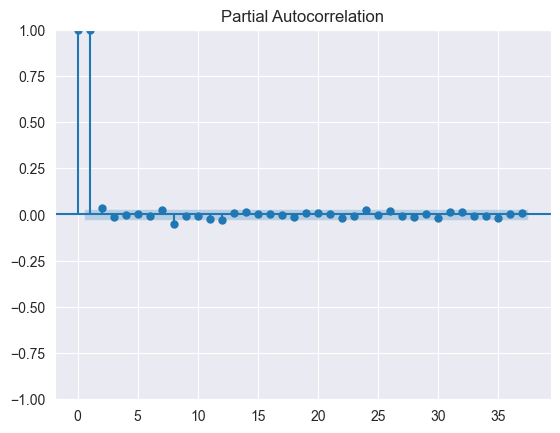

In [244]:
plot_acf(df.Value)
plot_pacf(df.Value)
plt.show()

In [245]:
df_novo = pd.read_csv('https://raw.githubusercontent.com/jdlmauricio/techalleg_fase_2/refs/heads/main/Dados%20Hist%C3%B3ricos%20-%20Ibovespa.csv', index_col='Data', parse_dates=['Último'])

C:\Users\jdlma\AppData\Local\Temp\ipykernel_15108\3978919464.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_novo = pd.read_csv('https://raw.githubusercontent.com/jdlmauricio/techalleg_fase_2/refs/heads/main/Dados%20Hist%C3%B3ricos%20-%20Ibovespa.csv', index_col='Data', parse_dates=['Último'])


In [246]:
df_novo

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
30.12.2024,120.283,120.267,121.050,120.158,"8,90M","0,01%"
27.12.2024,120.269,121.078,121.609,120.252,"8,94M","-0,67%"
26.12.2024,121.078,120.767,121.612,120.428,"8,34M","0,26%"
23.12.2024,120.767,122.105,122.105,120.617,"9,95M","-1,09%"
20.12.2024,122.102,121.183,122.209,120.700,"18,13M","0,75%"
...,...,...,...,...,...,...
07.01.2005,24.747,24.376,24.874,24.376,"104,96M","1,56%"
06.01.2005,24.367,24.695,24.808,24.250,"151,17M","-1,32%"
05.01.2005,24.692,24.859,25.001,24.523,"127,42M","-0,63%"


In [247]:
df_novo['Último'].nunique()

4796

In [248]:
df_1 = df_novo.loc[df_novo['store_nbr'] == 1, ['date', 'family', 'sales']]
df_1 = df_1.rename(columns={'date':'ds','sales':'y','family':'unique_id'})

KeyError: 'store_nbr'

In [ ]:
df_1

,ds,unique_id,y
id,,,
0,2013-01-01,AUTOMOTIVE,0.000000
1,2013-01-01,BABY CARE,0.000000
2,2013-01-01,BEAUTY,0.000000
3,2013-01-01,BEVERAGES,0.000000
4,2013-01-01,BOOKS,0.000000
...,...,...,...
2999134,2017-08-15,POULTRY,234.892000
2999135,2017-08-15,PREPARED FOODS,42.822998
2999136,2017-08-15,PRODUCE,2240.230000


In [ ]:
treino = df_1.loc[df_1['ds'] < '2014-01-01']
valid = df_1.loc[(df_1['ds'] >= '2014-01-01') & (df_1['ds'] < '2014-04-01')]
h = valid['ds'].nunique()

In [ ]:
h

90

In [ ]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [ ]:
!pip install statsforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

WMAPE: 57.50%


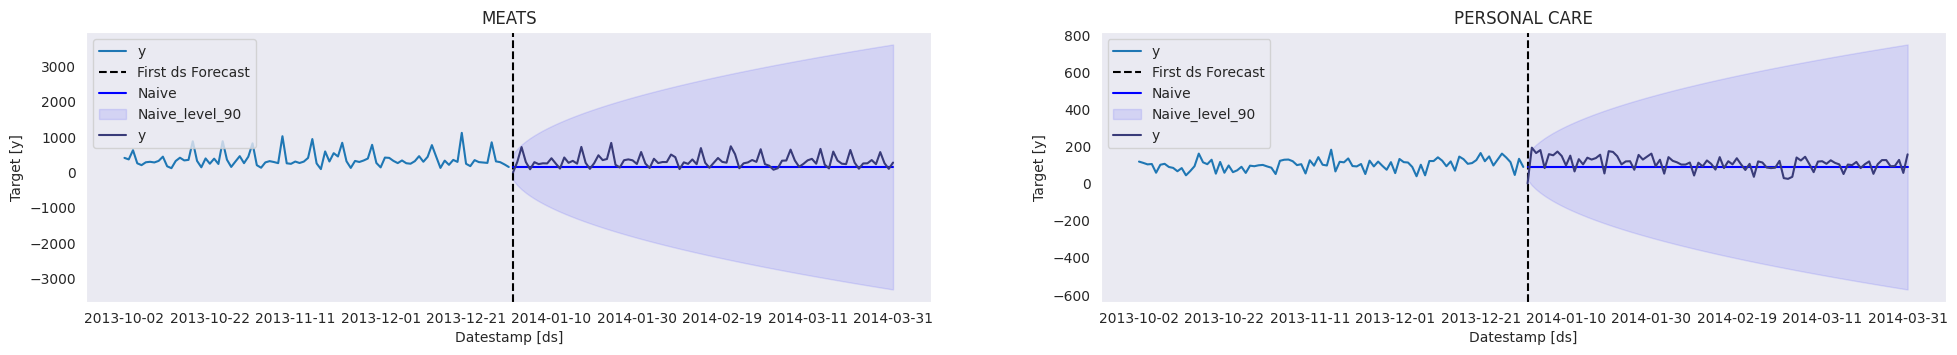

In [ ]:

model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)


In [ ]:
forecast_df

,unique_id,ds,Naive,Naive-lo-90,Naive-hi-90,y
0,AUTOMOTIVE,2014-01-01,2.000,-2.671534,6.671534,0.0000
1,AUTOMOTIVE,2014-01-02,2.000,-4.606546,8.606546,3.0000
2,AUTOMOTIVE,2014-01-03,2.000,-6.091333,10.091333,0.0000
3,AUTOMOTIVE,2014-01-04,2.000,-7.343067,11.343067,0.0000
4,AUTOMOTIVE,2014-01-05,2.000,-8.445867,12.445867,1.0000
...,...,...,...,...,...,...
2965,SEAFOOD,2014-03-27,13.933,-181.675537,209.541534,31.3880
2966,SEAFOOD,2014-03-28,13.933,-182.809509,210.675507,63.2869
2967,SEAFOOD,2014-03-29,13.933,-183.936981,211.802979,33.6150
2968,SEAFOOD,2014-03-30,13.933,-185.058060,212.924072,18.3520


WMAPE: 50.91%


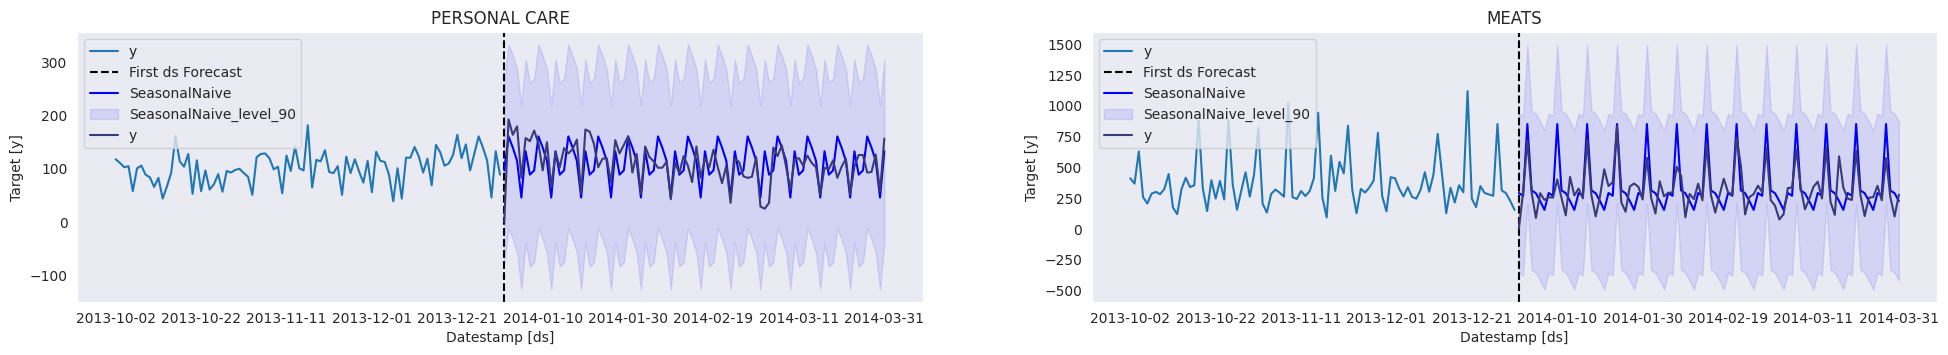

In [ ]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape2 = wmape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f"WMAPE: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)

In [ ]:
forecast_dfs

,unique_id,ds,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,y
0,AUTOMOTIVE,2014-01-01,1.000000,-15.373032,17.373032,0.0000
1,AUTOMOTIVE,2014-01-02,2.000000,-14.373032,18.373032,3.0000
2,AUTOMOTIVE,2014-01-03,6.000000,-10.373032,22.373032,0.0000
3,AUTOMOTIVE,2014-01-04,4.000000,-12.373032,20.373032,0.0000
4,AUTOMOTIVE,2014-01-05,0.000000,-16.373032,16.373032,1.0000
...,...,...,...,...,...,...
2965,SEAFOOD,2014-03-27,26.622999,-30.028112,83.274109,31.3880
2966,SEAFOOD,2014-03-28,22.541000,-34.110111,79.192108,63.2869
2967,SEAFOOD,2014-03-29,19.537001,-37.114109,76.188110,33.6150
2968,SEAFOOD,2014-03-30,7.108000,-49.543110,63.759109,18.3520


WMAPE: 53.02%


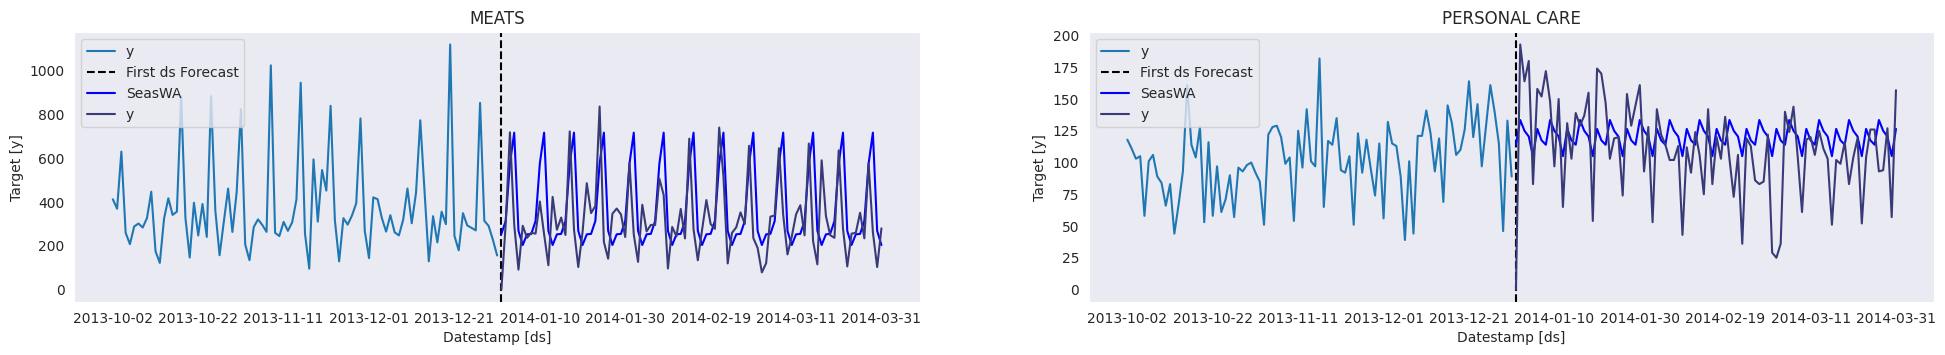

In [ ]:
model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=7, window_size=2)], freq='D', n_jobs=-1)
model_sm.fit(treino)

forecast_dfsm = model_sm.predict(h=h, level=[90])
forecast_dfsm = forecast_dfsm.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values)
print(f"WMAPE: {wmape3:.2%}")

model_sm.plot(treino, forecast_dfsm, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)

WMAPE: 51.94%


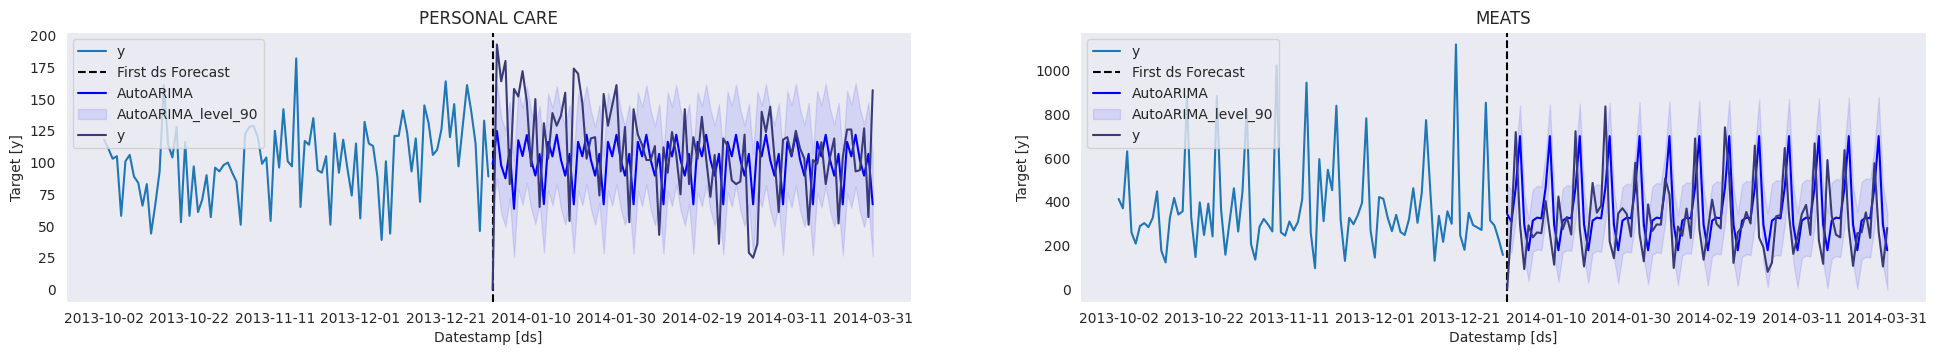

In [ ]:
#ARIMA - AR: olha para as vendas do passado e acha uma correlação futura
# I - quantidade que a série foi diferenciada/ MA: Média Móvel
model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)

In [ ]:
model_a = StatsForecast(models=[Naive(),AutoARIMA(season_length=7), SeasonalNaive()], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)